# Trabajo Académico Final: Aplicación de Métodos de Aprendizaje de Máquina para Clasificación
### Integrantes: Alex Mora y Byron Bravo
### Asignatura: Métodos de Aprendizaje de Máquina

## Introducción

En este trabajo se analiza un conjunto de datos con el objetivo de entender mejor los factores relacionados con la salida de empleados de una empresa. A lo largo del proceso se exploran los datos, se limpian, se visualizan, y se aplican distintos métodos para encontrar patrones y hacer predicciones. Se preparan las herramientas necesarias para trabajar con los datos: se cargan, se organizan y se revisan. Luego, se aplican técnicas de agrupamiento (clustering) para ver si los datos se pueden dividir en grupos con características similares. Como parte final, se entrenan los modelos de clasificación para predecir si una persona podría renunciar la empresa o no.

El fin de este trabajo es poner en práctica todo lo aprendido y determniar cómo distintas técnicas pueden ayudarnos a entender y anticipar el comportamiento de los empleados.

---


### Importación de librerías

Antes de comenzar con el análisis, se importan algunas herramientas básicas que se usarán a lo largo del trabajo. Estas librerías permiten leer y organizar los datos, hacer gráficos para entender mejor la información y aplicar algunos métodos de análisis.


In [58]:
#importación de librerias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

---
### Revisión de los datos

Para este paso se realizó el análisis del dataset cargándolo desde un archivo Excel. Luego, se hace una primera revisión para conocer su estructura general.

- df.head(): Se cargan los datos y se muestran las primeras filas para ver su organización.
- df.describe(): Obtenemos un resumen estadístico de las columnas numéricas, lo que nos ayuda a tener una idea general sobre los rangos de valores.
- df.info(): Consultamos la información del tipo de datos y cuántos registros hay en total.
- df.isnull().sum(): Revisamos si hay datos faltantes, necesario antes de continuar con el análisis.
---

In [59]:
df = pd.read_excel('data/HombresNum.xlsx')

In [60]:
df.head()

,Attrition,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,49,1,2,2,1,3,10,7,1,7
1,Yes,37,2,1,3,6,3,0,0,0,0
2,No,27,1,1,2,9,3,2,2,2,2
3,No,32,2,1,4,0,2,7,7,3,6
4,No,30,1,1,3,1,2,1,0,0,0


In [61]:
df.describe()

,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,36.653061,2.899093,2.028345,2.758503,2.613379,2.758503,6.859410,4.106576,2.116780,4.034014
std,9.042329,1.035148,1.113477,1.106970,2.470521,1.269373,6.205575,3.519361,3.188546,3.517587
min,18.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,3.000000,2.000000,3.000000,1.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,4.000000,3.000000,4.000000,4.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,5.000000,5.000000,4.000000,9.000000,6.000000,37.000000,18.000000,15.000000,17.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Attrition                882 non-null    object
 1   Age                      882 non-null    int64 
 2   Education                882 non-null    int64 
 3   JobLevel                 882 non-null    int64 
 4   JobSatisfaction          882 non-null    int64 
 5   NumCompaniesWorked       882 non-null    int64 
 6   TrainingTimesLastYear    882 non-null    int64 
 7   YearsAtCompany           882 non-null    int64 
 8   YearsInCurrentRole       882 non-null    int64 
 9   YearsSinceLastPromotion  882 non-null    int64 
 10  YearsWithCurrManager     882 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 75.9+ KB


In [63]:
df.isnull().sum()

Attrition                  0
Age                        0
Education                  0
JobLevel                   0
JobSatisfaction            0
NumCompaniesWorked         0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

---
### Análisis exploratorio y preprocesamiento de datos

En esta instrucción se transforma la columna Attrition, que originalmente contiene datos de tipo "Yes" y "No", a valores numéricos de 1 y 0. Es necesario realizar esta conversión porque los algoritmos de aprendizaje automático trabajan mejor con datos numéricos. 
Luego se muestran 10 registros seleccionados de forma aleatoria del conjunto de datos para observar diferentes ejemplos y combinaciones de variables dentro del dataset y detectar posibles valores atípicos.

---


In [64]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})

In [65]:
df.sample(10)

,Attrition,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
529,0,43,3,5,4,3,2,8,7,0,7
236,0,37,4,2,2,2,2,1,0,0,1
1,1,37,2,1,3,6,3,0,0,0,0
70,1,34,3,2,3,1,3,9,7,0,6
288,0,34,2,1,4,1,3,6,5,1,3
828,0,29,3,2,1,0,5,5,3,0,2
497,0,35,4,1,3,6,2,8,0,1,7
191,0,31,4,1,4,0,4,5,2,0,3
319,0,40,4,3,1,5,2,18,13,1,12
474,0,38,4,3,3,0,2,8,7,2,7


---
### Mapa de calor de correlación

Se genera una gráfica de tipo *heatmap* que muestra el grado de correlación entre las variables numéricas del dataset. Los valores van de -1 a 1, donde: **1** indica una correlación positiva perfecta, **-1** una correlación negativa perfecta y **0** indica que no hay relación.

---

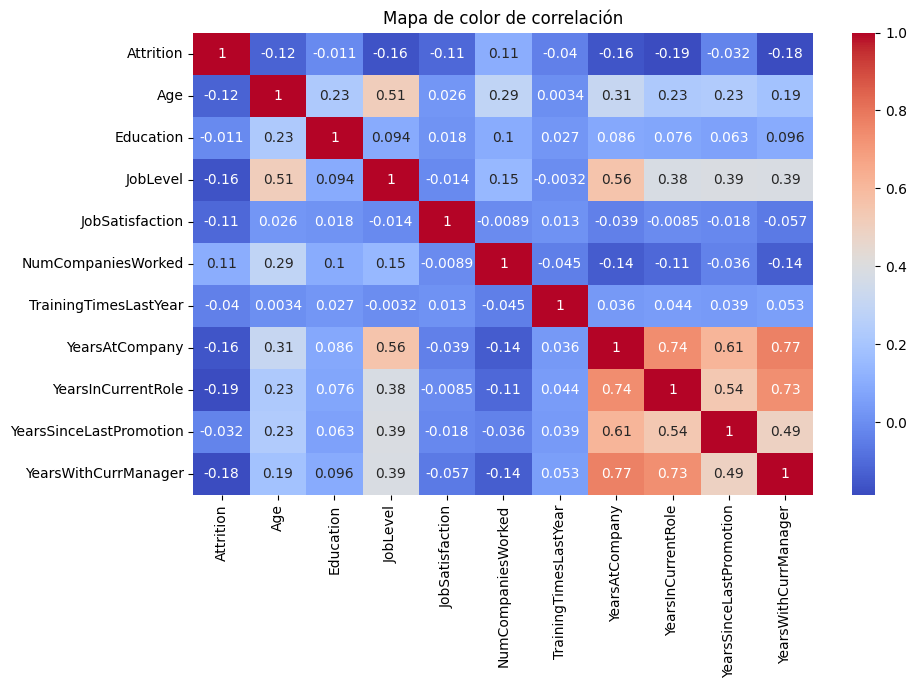

In [66]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Mapa de color de correlación')
plt.show()

---
### Gráfico de pares (Pairplot)

Se utiliza un gráfico de pares para visualizar la relación entre diferentes variables numéricas del dataset. Cada gráfico de dispersión permite observar cómo se comportan dos variables entre sí, y en la diagonal se muestran histogramas para ver la distribución individual de cada variable, fue necesario para detectar posibles agrupamientos, tendencias, relaciones lineales o no lineales, pero en especial para identificar valores atípicos de forma visual.

---

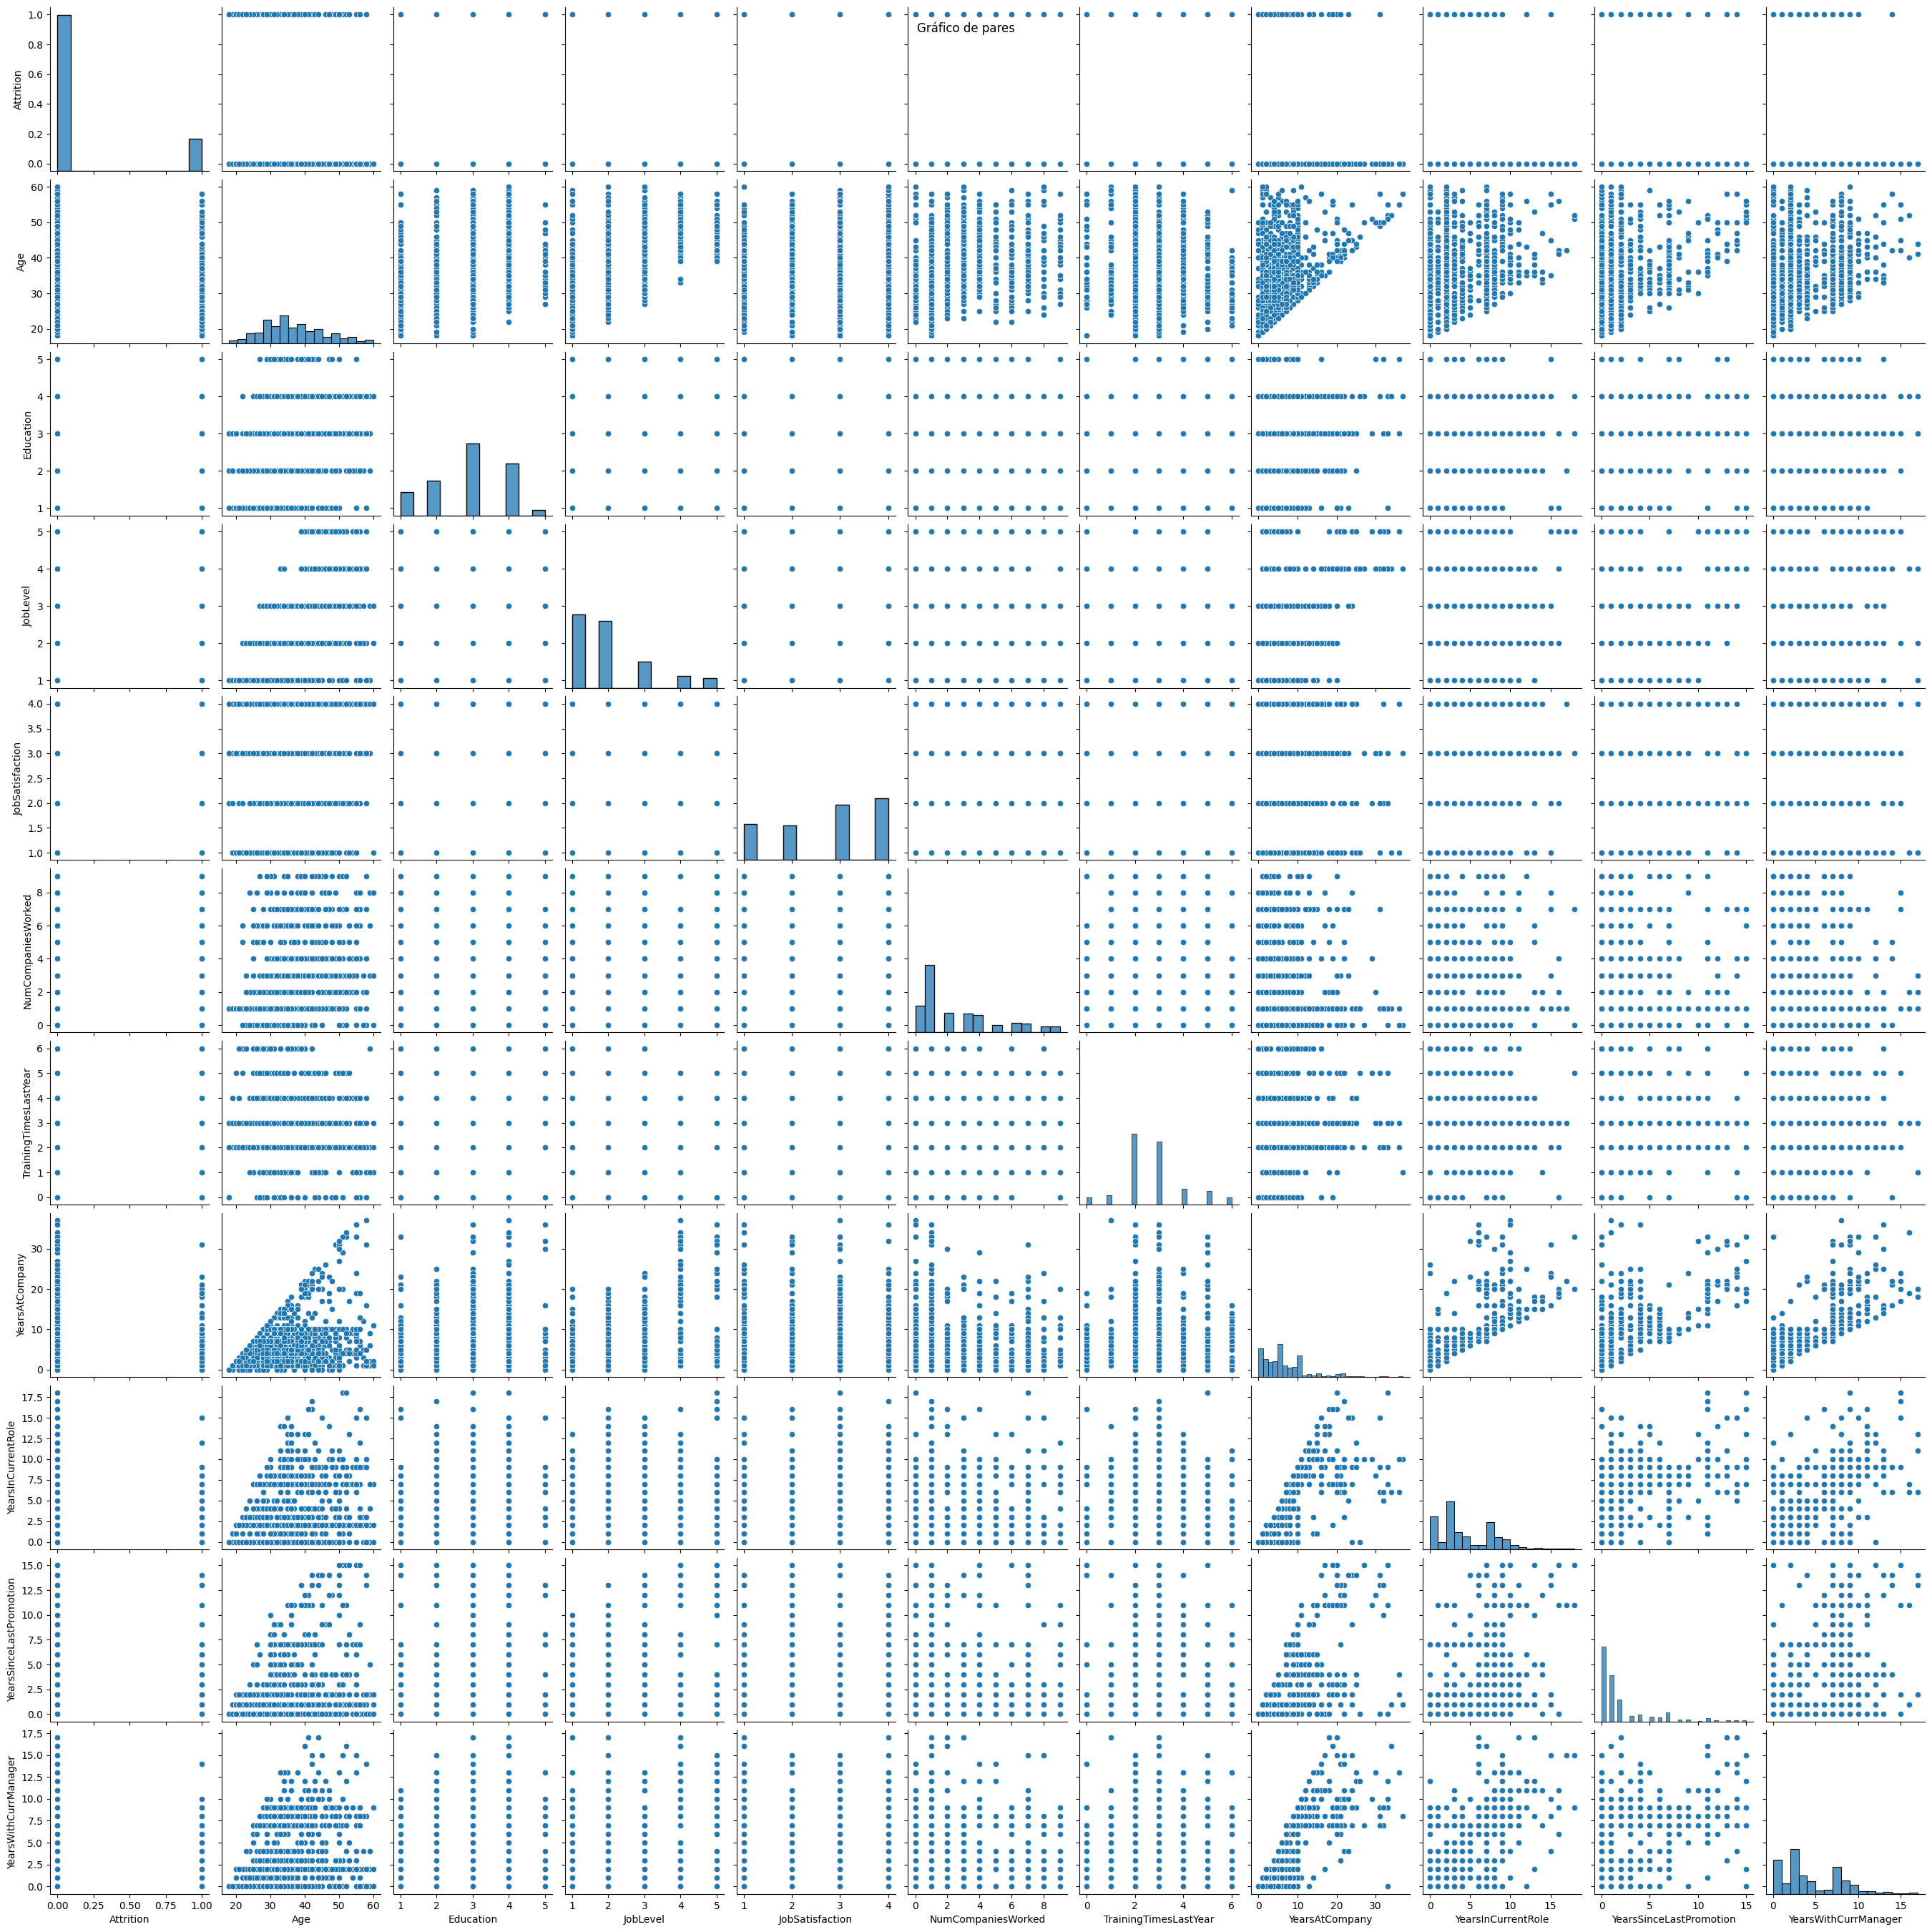

In [67]:
sns.pairplot(df)
plt.suptitle('Gráfico de pares')
plt.show()

---
### Histogramas de las variables

Se elaboran histogramas individuales para cada variable numérica del conjunto de datos y ver la distribución de los valores, detectar si hay sesgos, concentraciones en ciertos rangos o presencia de valores atípicos, necesario a la hora de entender el comportamiento de cada variable por separado,

---


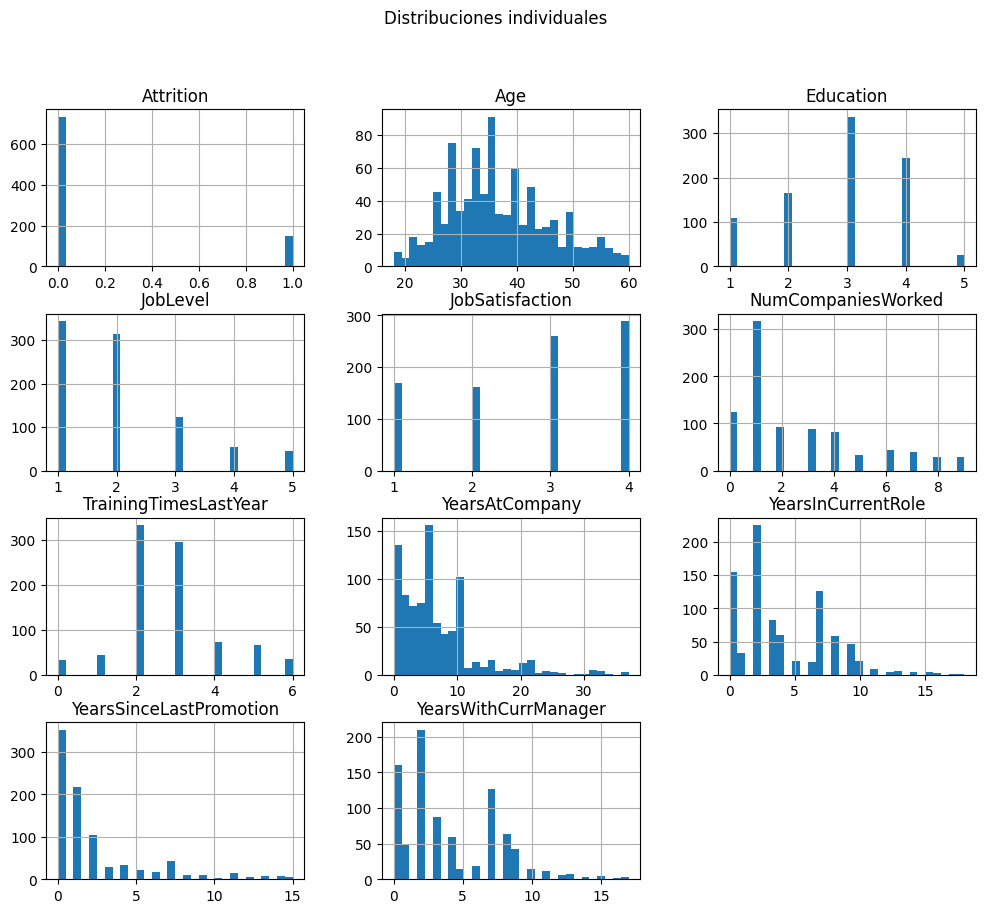

In [68]:
df.hist(bins = 30, figsize = (12,10))
plt.suptitle('Distribuciones individuales')
plt.show()

---
### Reducción de dimensionalidad con PCA

1. **Preparación de los datos:** Se excluye la columna Attrition, ya que es la variable que necesitamos para el análisis.
2. **Cálculo del PCA:** Se ajusta el modelo PCA a todas las variables numéricas restantes y se transforma el dataset.  
3. **Gráfica de varianza explicada acumulada:** El gráfico muestra cuánta información se conserva al agregar más componentes y nos sirve para elegir cuántas dimensiones necesitamos sin perder datos. Además, se imprime la cantidad de información acumulada que aporta cada componente del PCA.

---

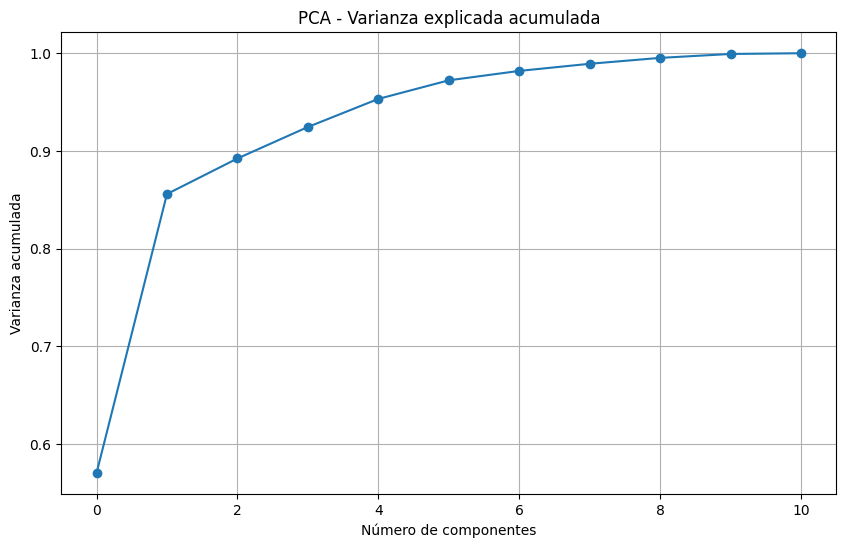

In [69]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
df.drop("Attrition", axis = 1)

# PCA para ver la varianza explicada
pca = PCA()
df_scaled = pca.fit_transform(df)

# Visualización de varianza acumulada
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.title("PCA - Varianza explicada acumulada")
plt.grid()
plt.show()

In [70]:
var_explicada = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(var_explicada):
    print(f"Componentes: {i+1} -> Varianza acumulada: {var:.4f}")


Componentes: 1 -> Varianza acumulada: 0.5703
Componentes: 2 -> Varianza acumulada: 0.8560
Componentes: 3 -> Varianza acumulada: 0.8923
Componentes: 4 -> Varianza acumulada: 0.9245
Componentes: 5 -> Varianza acumulada: 0.9533
Componentes: 6 -> Varianza acumulada: 0.9723
Componentes: 7 -> Varianza acumulada: 0.9819
Componentes: 8 -> Varianza acumulada: 0.9892
Componentes: 9 -> Varianza acumulada: 0.9952
Componentes: 10 -> Varianza acumulada: 0.9992
Componentes: 11 -> Varianza acumulada: 1.0000


---
### Estandarización de datos

Para que todas las variables estén en una misma escala aplicamos RobustScaler, que alinea los datos considerando la mediana y los cuartiles, lo que permite que no afecte con valores muy altos o muy bajos.

---

In [71]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)

---
### Aplicación de PCA

Se reduce la cantidad de variables a solo 6 componentes principales y nos permite trabajar con un conjunto de datos más simple y fácil de analizar.

---

In [72]:
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

---
### K-means y número de clúster

Se aplica el método del codo para encontrar cuántos grupos (clusters) son los más adecuados.

---

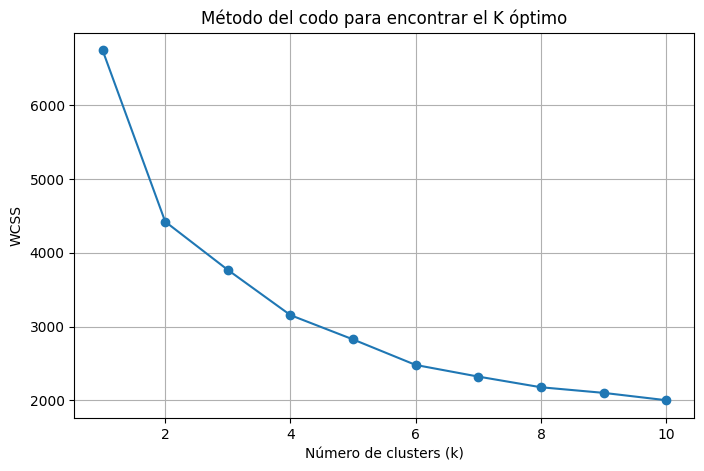

In [73]:
#Kmedias
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k,n_init = 'auto', random_state=42)
    kmeans.fit(df_pca)  
    wcss.append(kmeans.inertia_)  

# Gráfico del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Método del codo para encontrar el K óptimo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

---
### Aplicación de K-Means

Se agrupan los datos en 4 clústers utilizando K-Means y se visualiza el resultado con las dos primeras componentes principales, para lo cual los colores indican a qué grupo pertenece cada punto. En el mismo código se calcula el puntaje Silhouette para saber qué tan separadas están las agrupaciones.

---

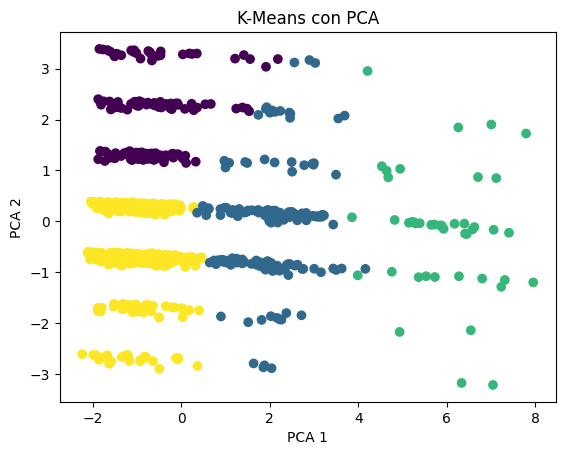

Silhouette Score K-Means: 0.28478798651311


In [74]:
kmeans = KMeans(n_clusters=4,n_init = 'auto' , random_state=42)
labels_kmeans = kmeans.fit_predict(df_pca)

# Visualizar
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title("K-Means con PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Silhouette
sil_kmeans = silhouette_score(df_pca, labels_kmeans)
print("Silhouette Score K-Means:", sil_kmeans)

---
### Agrupamiento jerárquico

Se agrupan los datos en 3 conjuntos para graficar cómo se conectan entre sí, a través de un dendrograma. Nuevamente se calcula un puntaje Silhouette para saber en que magnitud quedaron separados los grupos.

---

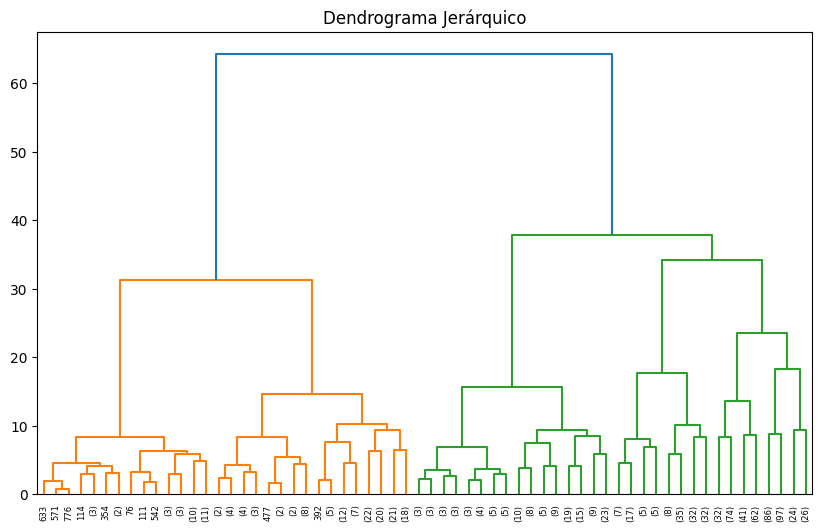

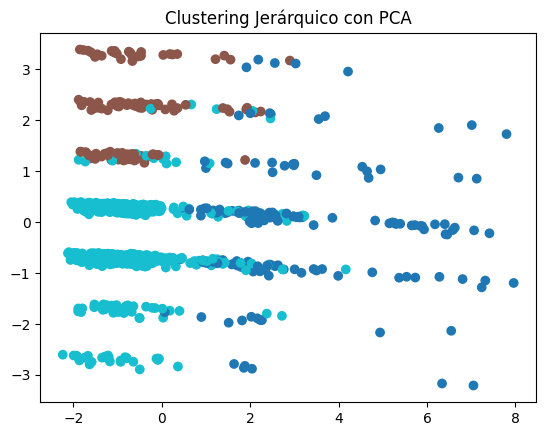

Silhouette Score Jerárquico: 0.2528059363935955


In [75]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_matrix = linkage(df_pca, method='ward')

# Dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrograma Jerárquico")
plt.show()

# Agrupar 
labels_hier = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Visualizar clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_hier, cmap='tab10')
plt.title("Clustering Jerárquico con PCA")
plt.show()

# Silhouette
sil_hier = silhouette_score(df_pca, labels_hier)
print("Silhouette Score Jerárquico:", sil_hier)

---
### Agrupamiento con DBSCAN

A diferencia clustering jerárquico que me ayuda a ver como se forman los grupos, con el método DBSCAN se puede identificar los puntos que no pertenecen a ningún grupo es decir los valores atípicos 

---

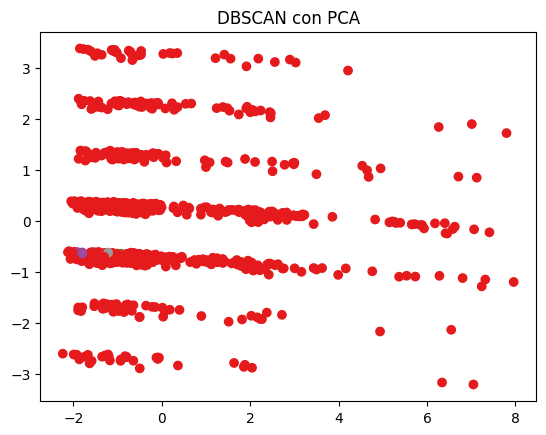

Silhouette Score DBSCAN: 0.5536347811169962


In [76]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.39, min_samples=5)
labels_dbscan = dbscan.fit_predict(df_pca)

# Visualizar
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_dbscan, cmap='Set1')
plt.title("DBSCAN con PCA")
plt.show()

# Silhouette 
valid = labels_dbscan != -1
if valid.sum() > 0:
    sil_dbscan = silhouette_score(df_pca[valid], labels_dbscan[valid])
    print("Silhouette Score DBSCAN:", sil_dbscan)
else:
    print("DBSCAN no detectó clusters válidos.")

---
### Comparación de resultados con Silhouette Score

Se comparan los tres métodos de agrupamiento usando el Silhouette Score para cononcer cuál es el valor más alto (cercano a 1) y saber cuál método consiguió el mejor resultado para agrupar.

---

In [77]:
print("Silhouette Score DBSCAN:", sil_dbscan)
print("Silhouette Score Jerárquico:", sil_hier)
print("Silhouette Score K-Means:", sil_kmeans)

Silhouette Score DBSCAN: 0.5536347811169962
Silhouette Score Jerárquico: 0.2528059363935955
Silhouette Score K-Means: 0.28478798651311


---
### Número de clusters detectados por DBSCAN

Se calcula cuántos grupos detectó DBSCAN, sin contar los puntos que quedaron fuera de cualquier grupo es decir aquellos valores atípicos.

---

In [78]:
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print("Número de clusters detectados", {n_clusters})

Número de clusters detectados {3}


---
### Separación de los datos para entrenar y probar

Se preparan los datos para entrenar el modelo, para lo cual se unen los resultados del análisis tanto del PCA como el DBSCAN y con la información la renunic a de la personaa la empresa "Attrition".
Después, se dividen los datos en dos partes: Para **entrenar el modelo** (80% de los datos) y la otra para **probar si el modelo aprende bien** (20% restantes).

---

In [79]:
df_pca_clust = np.concatenate([df_pca, labels_dbscan.reshape(-1,1)],axis = 1)

In [80]:
x = df_pca_clust
y = df['Attrition']

In [81]:
#Separacion de los datos para el entenamiento 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_pca_clust, y, test_size=0.2, random_state=42, stratify = y
)

In [82]:
print(df['Attrition'].value_counts())

Attrition
0    732
1    150
Name: count, dtype: int64


---
### Balanceo de clases con SMOTE

En un primer análisis de los datos se pudo conocer que había más personas que no se fueron de la empresa, para ello se usa SMOTE y balancear los datos de tal forma que el modelo puede aprender mejor.

---

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
x_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [84]:
print(y_train_res.value_counts())

Attrition
0    585
1    585
Name: count, dtype: int64


---
### Entrenamiento del modelo con Random Forest

Se crea y entrena un modelo **Random Forest** con 100 árboles y se utiliza los datos ya equilibrados por SMOTE.

---

In [85]:
from sklearn.ensemble import RandomForestClassifier
clasificacion = RandomForestClassifier(class_weight='balanced',n_estimators=100,random_state = 42)
clasificacion.fit(x_train_res,y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [86]:
y_pred = clasificacion.predict(X_test)

---
### Curva ROC y AUC
Se genera la curva ROC, que muestra qué tan bien el modelo distingue entre personas que se quedan y las que se van. El valor AUC (Área Bajo la Curva) resume este desempeño: **Más cerca de 1** = mejor rendimiento y **cerca de 0.5** = el modelo no diferencia mejor que al azar. Necesario para saber si los resultados están desbalanceados

---

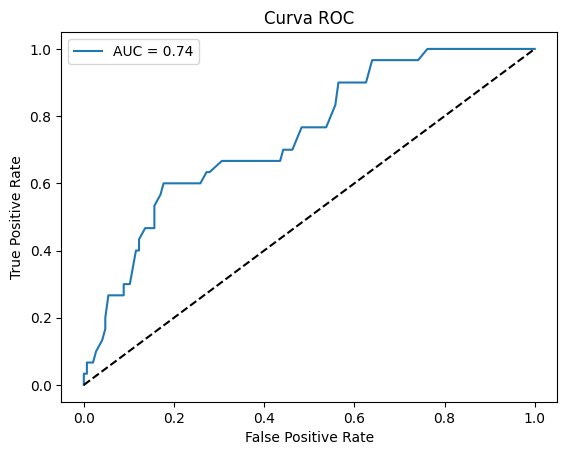

In [87]:
from sklearn.metrics import roc_curve, auc

y_prob = clasificacion.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()


---
### Evaluación del modelo
A continuación se usan varias métricas para medir qué tan bien predice el modelo si una persona renuncia o no la empresa. Las métricas utilizadas son Accuracy, Precision, Recall, F1 Score. También se muestra la **matriz de confusión**, que compara las predicciones con los valores reales, y un reporte general que resume todas las métricas por resultado.

---

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report

In [89]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average = 'binary')
recall = recall_score(y_test, y_pred,average = 'binary')
f1 = f1_score(y_test, y_pred,average = 'binary')
matriz = confusion_matrix(y_test, y_pred)

print("Resultados del modelo:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nMatriz de Confusión:")
print(matriz)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Resultados del modelo:
Accuracy: 0.7966
Precision: 0.4118
Recall: 0.4667
F1 Score: 0.4375

Matriz de Confusión:
[[127  20]
 [ 16  14]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       147
           1       0.41      0.47      0.44        30

    accuracy                           0.80       177
   macro avg       0.65      0.67      0.66       177
weighted avg       0.81      0.80      0.80       177



---
### Entrenamiento del modelo de Regresión Logística
Se crea y entrena un modelo de Regresión Logística para predecir la renuncia de los empleados, obteniendo un segundo modelo listo para comparar su rendimiento con otros modelos.

---

In [90]:
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression(max_iter = 1000,random_state = 42, class_weight='balanced')
reg_log.fit(x_train_res,y_train_res)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [91]:
y_pred_log = reg_log.predict(X_test)

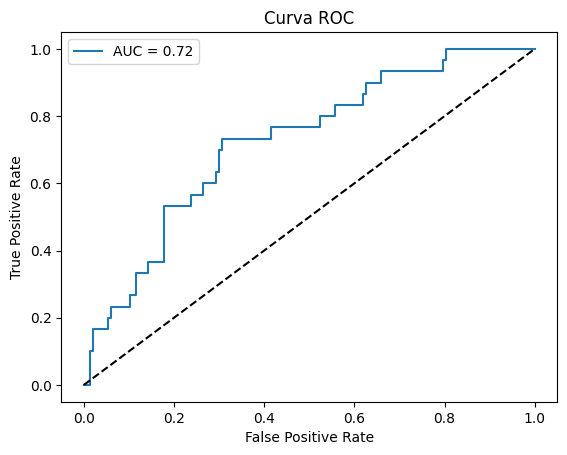

In [92]:
y_prob = reg_log.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()


---
### Evaluación del modelo de Regresión Logística
Se evalúa el rendimiento del modelo usando las mismas métricas que antes.

---

In [93]:
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log,average = 'binary')
recall = recall_score(y_test, y_pred_log,average = 'binary')
f1 = f1_score(y_test, y_pred_log,average = 'binary')
matriz = confusion_matrix(y_test, y_pred_log)

print("Resultados del modelo:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nMatriz de Confusión:")
print(matriz)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_log))

Resultados del modelo:
Accuracy: 0.6893
Precision: 0.2951
Recall: 0.6000
F1 Score: 0.3956

Matriz de Confusión:
[[104  43]
 [ 12  18]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       147
           1       0.30      0.60      0.40        30

    accuracy                           0.69       177
   macro avg       0.60      0.65      0.59       177
weighted avg       0.79      0.69      0.72       177



---
### Entrenamiento del modelo XGBoost
Se entrena un modelo XGBoost que es un algoritmo de árboles muy potente y puede lograr gran precisión en clasificación.

---

In [94]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric = 'logloss', random_state = 42)
xgb.fit(x_train_res,y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [95]:
y_pred_xgb = xgb.predict(X_test)

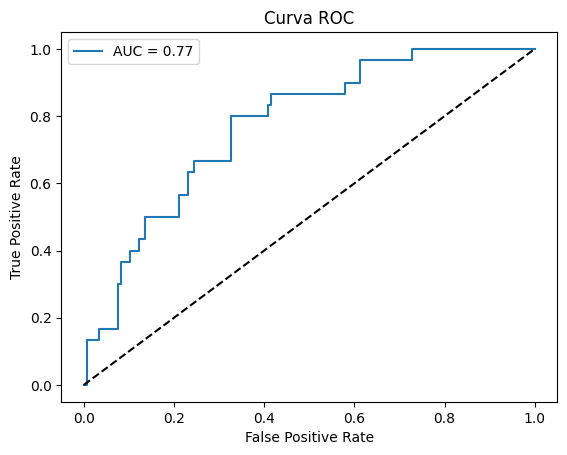

In [96]:
y_prob = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()


---
### Evaluación del modelo XGBoost
Se evalúa el rendimiento del modelo usando las mismas métricas que antes.

---

In [97]:
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
matriz = confusion_matrix(y_test, y_pred_xgb, )

print("Resultados del modelo:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nMatriz de Confusión:")
print(matriz)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))

Resultados del modelo:
Accuracy: 0.7853
Precision: 0.3947
Recall: 0.5000
F1 Score: 0.4412

Matriz de Confusión:
[[124  23]
 [ 15  15]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       147
           1       0.39      0.50      0.44        30

    accuracy                           0.79       177
   macro avg       0.64      0.67      0.65       177
weighted avg       0.81      0.79      0.79       177



## Análisis y discusión de Resultados

Se aplicaron tres modelos de clasificación para predecir la renuncia de los empleados de la varaible Attrition, a partir de los datos que fueron procesados con PCA y agrupados con DBSCAN.

| Modelo              | Accuracy | Precision | Recall | F1 Score |
|---------------------|----------|-----------|--------|----------|
| Random Forest       | 0.7966   | 0.4118    | 0.4667 | 0.4375   |
| Regresión Logística | 0.6893   | 0.2951    | 0.6000 | 0.3956   |
| XGBoost             | 0.7853   | 0.3947    | 0.5000 | 0.4412   |

- Random Forest y XGBoost fueron los modelos con mejor rendimiento general, mostrando una buena capacidad de predicción en términos de accuracy y F1 score.
- XGBoost tuvo el mejor balance global entre precisión y recall, con un F1 score ligeramente superior.
- Regresión Logística, con menor precisión pero logró tener un recall más alto, lo que indica que detectó más casos de personas que renunciaron, aunque con más falsos positivos.

En general, todos los modelos se enfrentaron desbalance de los resultados, pero las técnicas como SMOTE y el uso del manejo del desbalance ayudaron a mejorar la equidad en las predicciones.

### Conclusiones
- El modelo XGBoost se destaca como el más equilibrado de todos, logrando una buena detección de casos de abandono sin sacrificar demasiado la precisión.
- Random Forest en cambio es una opción fuerte cuando se tienen métricas muy similares y un rendimiento estable.
- En necesatio este tipo de análisis para mostrar la importancia de comparar diferentes métricas y poder elegir el modelo más adecuado según el objetivo del problema.
